In [34]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda,Conv2D,MaxPooling2D,Dropout,Dense,Flatten,Activation
from keras.utils import plot_model


In [3]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 502s 3us/step


In [4]:
classes = ["airplane","automobile","bird","car","deer","dog","frog","horse","ship","truck"]

In [5]:
num_classes = len(classes)
num_classes

10

In [6]:
from tensorflow.keras.utils import to_categorical
# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [7]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [11]:
IMAGE_SIZE = 32
CHANNELS = 3

In [57]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [70]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',padding = 'same',input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64,(3,3),activation='relu',padding = 'same',input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512,activation = 'relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes,activation = 'softmax'))
    model.summary()

    return model


In [14]:
model = cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [15]:
checkpoint = ModelCheckpoint('best_model_simple.h5',
monitor = 'val_loss',
  verbose = 0,
                   save_best_only = True,
                   mode = 'auto')

In [16]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=1.0e-4),
              metrics = ['accuracy'])

In [17]:
model_details = model.fit(X_train,y_train_one_hot,batch_size = 128,epochs=100,validation_data = (X_test,y_test_one_hot),callbacks = [checkpoint],verbose = 1)

Epoch 1/100
391/391 [==============================] - 77s 192ms/step - loss: 1.9206 - accuracy: 0.2943 - val_loss: 1.5937 - val_accuracy: 0.4296
Epoch 2/100


C:\Users\DELL\anaconda3\envs\yolov8\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


391/391 [==============================] - 76s 194ms/step - loss: 1.5685 - accuracy: 0.4288 - val_loss: 1.4411 - val_accuracy: 0.4858
Epoch 3/100
391/391 [==============================] - 76s 194ms/step - loss: 1.4461 - accuracy: 0.4792 - val_loss: 1.3502 - val_accuracy: 0.5216
Epoch 4/100
391/391 [==============================] - 76s 195ms/step - loss: 1.3677 - accuracy: 0.5085 - val_loss: 1.2835 - val_accuracy: 0.5420
Epoch 5/100
391/391 [==============================] - 76s 194ms/step - loss: 1.3094 - accuracy: 0.5320 - val_loss: 1.2093 - val_accuracy: 0.5708
Epoch 6/100
391/391 [==============================] - 76s 195ms/step - loss: 1.2609 - accuracy: 0.5522 - val_loss: 1.1713 - val_accuracy: 0.5811
Epoch 7/100
391/391 [==============================] - 76s 194ms/step - loss: 1.2061 - accuracy: 0.5732 - val_loss: 1.1211 - val_accuracy: 0.6070
Epoch 8/100
391/391 [==============================] - 76s 195ms/step - loss: 1.1637 - accuracy: 0.5870 - val_loss: 1.1005 - val_accurac

In [36]:
scores = model.evaluate(X_test,y_test_one_hot,verbose = 0)
print("Accuracy : %.2f%%" % (scores[1]*100))

Accuracy : 79.04%


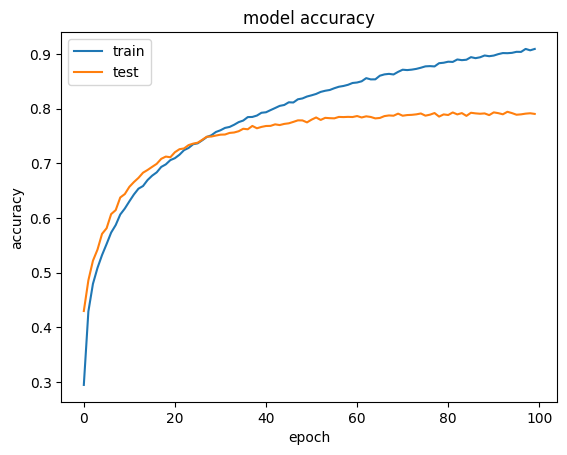

In [37]:
plt.plot(model_details.history['accuracy'])
plt.plot(model_details.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

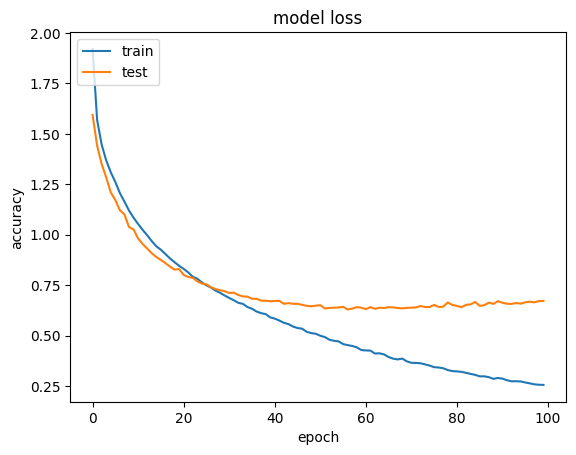

In [38]:
plt.plot(model_details.history['loss'])
plt.plot(model_details.history['val_loss'])
plt.title("model loss")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()